<a href="https://colab.research.google.com/github/ShengHangNB/Decision-Tree-C4.5/blob/master/31005_MLAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thực hiện thuật toán**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#iris

## **1. Chuẩn bị cho bộ dữ liệu iris**

Bộ dữ liệu Iris - được sử dụng để triển khai thuật toán
Bạn có thể xem và tải xuống bộ dữ liệu này từ bộ dữ liệu Kho lưu trữ máy học của UCI: https://archive.ics.uci.edu/ml/datasets/Iris

In [2]:
from sklearn.metrics import f1_score,recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:

# df = pd.read_csv("/content/drive/MyDrive/BTL Của Huy/2 Code/Hauu/Decision-Tree-C4.5/dataset/iris.csv")
path="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/KDLVKP/BTL Của Huy"
df = pd.read_csv(path+"/2 Code/Hauu/Decision-Tree-C4.5/dataset/iris.csv")
# df = pd.read_csv("/content/drive/MyDrive/BTL Của Huy/2 Code/Hauu/Decision-Tree-C4.5/dataset/iris.csv")
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## **2.Tiền xử lý và xem trước tập dữ liệu**


In [4]:
def change_target_type(x):
  '''
    Chuyển đổi chuỗi trong class thành số
    input: string in column class
    output: number
  '''
  if x == 'Iris-setosa':
    return 0

  elif x == 'Iris-versicolor':
    return 1
  
  elif x == 'Iris-virginica':
    return 2

# use .apply() để áp dụng hàm change_target_type vào trong cột class ở dataframe
df.loc[:,"class"] = df["class"].apply(change_target_type)

df.head()

<ipython-input-4-dbc519ae8da7>:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,"class"] = df["class"].apply(change_target_type)


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Xem số liệu thống kê cho tất cả các thuộc tính số trong một bảng

Đối với mỗi dữ liệu số, kết quả thống kê được tính toán sẽ bao gồm số lượng, giá trị trung bình, độ lệch chuẩn, tối thiểu, tối đa và phân vị thứ 25, phân vị thứ 50 và phân vị thứ 75.

Các giá trị của "sepal length" nằm trong khoảng từ 4,3 đến 7,9

Các giá trị của "sepal width" nằm trong khoảng từ 2,0 đến 4,4

Các giá trị của "petal length" nằm trong khoảng từ 1,0 đến 6,9

Các giá trị của "petal width" nằm trong khoảng từ 0,1 đến 2,5

## **3. Phân chia tập dữ liệu**

Trong phần này,chia toàn bộ bộ dữ liệu thành hai bộ dữ liệu con:

1. Bộ dữ liệu thuộc tính X_total (loại DataFrame)
2. Bộ dữ liệu mục tiêu y_total (Loại sê-ri)

Sau đó, sử dụng chức năng **train_test_split**, đặt **test_size = 0,33** để chia bộ dữ liệu X_total và y_total, các bộ dữ liệu phụ như sau:

1. X_train: chiếm 80% bộ dữ liệu thuộc tính X_total
2. X_test: chiếm 20% trong bộ dữ liệu thuộc tính X_total
3. y_train: chiếm 80% bộ dữ liệu mục tiêu y_total
4. y_test: chiếm 20% bộ dữ liệu mục tiêu y_total


In [5]:
# sử dụng hàm df.keys() để lấy tên các thuộc tính
attrs = df.keys()[:-1]

# tách tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra
print("Số lượng mẫu trong tập dữ liệu là {}\n".format(df.shape[0]))
X_total = df[attrs]  # tập các thuộc tính
y_total = df.iloc[:,-1]  # tập nhãn

# đặt giá trị random_state = 48 (random seed) để đảm bảo phân chia giữa tập huấn luyện và tập kiểm tra luôn giống nhau
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.2, random_state=48)

# in ra số lượng mẫu trong tập huấn luyện và tập kiểm tra
print("Số lượng mẫu trong tập huấn luyện là {}".format(X_train.shape[0]))
print("Số lượng mẫu trong tập kiểm tra là {}".format(X_test.shape[0]))


Số lượng mẫu trong tập dữ liệu là 150

Số lượng mẫu trong tập huấn luyện là 120
Số lượng mẫu trong tập kiểm tra là 30


## **4. Xác định các công cụ**

Lớp công cụ "Myutils" sẽ được sử dụng trong quá trình xây dựng cây quyết định c4.5 tiếp theo

Dưới đây là mô tả ngắn gọn về chức năng trong lớp này:


1. get_split_pointSet(): Phân biệt các thuộc tính liên tục thông qua phân đôi
2. get_discrete_variables(): Chuyển các biến liên tục qua điểm chia thành các biến phân loại
3. compute_entropy(): tính entropy thông tin
4. compute_info_gain_ratio(): Tính tỷ lệ thu được thông tin của thuộc tính đã chỉ định cho một biến liên tục

In [6]:
class Myutils:
  def get_split_pointSet(self,attr_series):
    '''
    Rời rạc hóa các thuộc tính liên tục thông qua phân đôi

    parameters:
       attr_series (Loại sê-ri): Giá trị của một cột thuộc tính được truyền vào

    output：Mảng có tất cả các điểm chia
    '''

    # hàm unique sẽ lọc dữ liệu tránh trùng lặp
    unique_values = np.unique(attr_series)
    # print("unique_values", unique_values)
    # Tính giá trị trung bình giữa 2 điểm khác nhau liên tiếp
    # result = [(unique_values[i] + unique_values[i+1]) / 2  for i in range(len(unique_values)-1)]
    # print("np.unique(result)",np.unique(result))
    # return np.unique(result)
    return unique_values
    
  def get_discrete_variables(self, X, attr, split_point):
      '''
      Chuyển đổi biến liên tục thành biến phân loại thông qua điểm chia.

      Tham số:
          X (kiểu DataFrame): Bộ dữ liệu đầu vào.
          attr (kiểu chuỗi): Tên cột thuộc tính liên quan.
          split_point (kiểu float): Điểm chia để chuyển đổi.

      Kết quả: Một cột mới với các giá trị phân loại tương ứng.

      '''
      # print("get_discrete_variables - split_point" ,split_point )
      # Tạo chuỗi các giá trị cần chia trong danh sách bins_to_cut.
      split_point1=split_point
      if split_point1 ==min(X[attr]):split_point1=split_point1 + 0.0000001
      if split_point1 ==max(X[attr]):split_point1=split_point1 - 0.0000001
      bins_to_cut = [min(X[attr]), split_point1, max(X[attr])]


      bins_to_cut = sorted(bins_to_cut) #new *********************************************

      # Chỉ định nhãn cho các khoảng giá trị trong labels_to_cut.
      labels_to_cut = [attr + ' < ' + str(split_point), attr + ' > ' + str(split_point)]

      # Sử dụng hàm .cut() để lấy cột biến phân loại, bao gồm khoảng giá trị đầu tiên.
      categorized_column = pd.cut(X[attr], bins=bins_to_cut, labels=labels_to_cut, include_lowest=True)

      return categorized_column

  def compute_entropy(self,y):
    '''
    Tính entropy

    Parameters:
      y(Series type): các giá trị đích được truyền vào
    return: 0.0 hoặc entropy thông tin được tính toán
    '''
      
    # nếu độ dài của y nhỏ hơn 2, nghĩa là không còn sự không chắc chắn nào
    # trong trường hợp này, entropy bằng 0.0
    if len(y) < 2:
      return 0.0

    # nếu các giá trị duy nhất trong y ít hơn 2, nghĩa là tất cả các mẫu có cùng giá trị đặc trưng
    # trong trường hợp này, entropy bằng 0.0
    if len(np.unique(y)) < 2:
      return 0.0

    # tính số lượng của các giá trị trong chuỗi y, normalize = True có nghĩa là số lượng được trình bày dưới dạng tần suất
    freq = y.value_counts(normalize=True)

    # Kiểm tra xem có tần số nào bằng 0.0 trước khi tính log
    if (freq == 0).any():
      # Sử dụng mask boolean để lọc ra các tần số khác 0.0
      freq = freq[freq != 0]
      return -(freq * np.log2(freq)).sum()

    else:
      return -(freq * np.log2(freq)).sum()
  def compute_info_gain_ratio(self,X,y,attr,split_point_list):
    '''
    Tính toán chỉ số information gain ratio của một thuộc tính cho một biến liên tục.
    
    Parameters:
      X (DataFrame type): Dữ liệu với giá trị các thuộc tính
      y (Series type): Dữ liệu với giá trị target 
      attr (String type): Thuộc tính được sử dụng để tính toán chỉ số information gain ratio 
      split_point_lst (numpy.array type): Danh sách các điểm phân chia

    Return values: Kết quả của chỉ số information gain ratio và điểm phân chia tốt nhất dưới dạng số thực     
    '''
    # Khởi tạo các biến best_split_point, best_info_gain, split_entropy, best_categorized_column
    best_split_point = 0.0
    best_info_gain = 0.0
    split_entropy = 0.0
    best_categorized_column = None 

    # Nếu chiều dài của split_point_list là 0, có nghĩa là không có điểm phân chia nào
    # Và không cần xem xét thuộc tính này nữa
    # Do đó, kết quả có thể là 0.0 và None
    if len(split_point_list) == 0:
      return 0.0, None

    else:
      # Dùng vòng lặp để tính toán chỉ số information gain tốt nhất và điểm phân chia tốt nhất
      for split_point in split_point_list:
        # if split_point == min(split_point_list) or split_point == max(split_point_list):
        #   continue
        if split_point == max(split_point_list):
          continue
        # print("split_point",split_point)
        # Chia dữ liệu X thành các tập con mà giá trị nhỏ hơn điểm phân chia 
        lower_index_boolean = X[attr] <= split_point
        # print("lower_index_boolean",lower_index_boolean)
        lower_X = X[lower_index_boolean]
        # print("lower_X",lower_X)
        lower_y = y[lower_index_boolean]

        # Chia dữ liệu X thành các tập con mà giá trị lớn hơn điểm phân chia
        upper_index_boolean = X[attr] > split_point
        # print("upper_index_boolean",upper_index_boolean)
        upper_X = X[upper_index_boolean]
        # print("upper_X",upper_X)
        upper_y = y[upper_index_boolean]
        
        # Tính toán entropy của giá trị target
        Ent_D = self.compute_entropy(y)
        # Tính toán xác suất của hai tập dữ liệu con này chiếm tổng số dữ liệu ban đầu riêng lẻ
        lower_prob = len(lower_X) / len(X)
        upper_prob = len(upper_X) / len(X)

        # Tính toán entropy của các tập con mà tất cả các giá trị đều nhỏ hơn điểm phân chia
        lowersets_entropy = lower_prob * self.compute_entropy(lower_y)
        # print("lowersets_entropy",lowersets_entropy)

        # tính entropy của các sub-datasets mà tất cả giá trị lớn hơn điểm chia
        uppersets_entropy = upper_prob * self.compute_entropy(upper_y)   
        # print("uppersets_entropy",uppersets_entropy)

        # tính information gain cho điểm chia này
        info_gain = Ent_D - (lowersets_entropy + uppersets_entropy)
        # print("info_gain",info_gain)

        # lấy các giá trị phân loại cho các giá trị số lớn hơn hoặc nhỏ hơn điểm chia
        categorized_column = self.get_discrete_variables(X,attr,split_point)
        # print(" categorized_column" , categorized_column)

        # chọn thông tin lợi nhuận tốt nhất và điểm chia tốt nhất
        if info_gain >= best_info_gain:
          best_info_gain = info_gain
          best_split_point = split_point
          best_categorized_column = categorized_column

      # Nếu chỉ có một điểm chia trong danh sách điểm chia và
      # thông tin lợi nhuận của điểm chia này bằng 0, thì điểm chia tốt nhất cũng là 0
      if best_info_gain == 0:
        return 0.0, best_split_point

      # Tính split information entropy
      split_entropy = self.compute_entropy(best_categorized_column)

      # sử dụng thông tin lợi nhuận tốt nhất để tính tỷ lệ thông tin lợi nhuận
      # nếu split information entroy bằng 0, nghĩa là thuộc tính này là hằng số

      if split_entropy == 0:
        return "undefined", None
        
      else:
        info_gain_ratio = best_info_gain / split_entropy
        print("info_gain_ratio , best_split_point", info_gain_ratio , best_split_point)
        return info_gain_ratio , best_split_point



### tạp 1 đối tượng

In [7]:
# Instantiate an object of Myutils class to prepare for the subsequent c4.5 decision tree construction
utils = Myutils()

## **5. Định nghĩa 2 lớp hướng đối tượng để xây dựng cây quyết định**

1. Nút cây:

   Lớp này chủ yếu được sử dụng để **tạo nút cây** và **in thông tin chi tiết của nút** theo cách đệ quy.
  
   Mô tả ngắn gọn về hai chức năng trong lớp này là:
  
   make(): tách thuộc tính theo thuật toán C4.5 và tạo nút con theo giá trị của thuộc tính tách.
  
   print_node_details(): in chi tiết thông tin của từng node, hàm này dùng để giúp mình hiểu cấu trúc cây và vẽ cấu trúc cây quyết định sau này.



2. Cây C4_5:

   Lớp này chủ yếu là **tạo nút cây gốc**, **phù hợp với mô hình cây quyết định** và **đưa ra dự đoán** theo mô hình phù hợp.

   Mô tả ngắn gọn về ba chức năng trong lớp này là:

   fit(): khớp với mô hình bằng cách gọi lại hàm make() trong nút gốc

   make_decision(): dự đoán quyết định cho từng mẫu trong mô hình được trang bị

   predict (): được chuyển vào bộ dữ liệu thử nghiệm và dự đoán từng mẫu một, sau đó trả về danh sách các quyết định cho từng mẫu.
  

###class treenode 

In [8]:
class TreeNode:
  '''
  Xây dựng toàn bộ cây bằng thuật toán đệ quy
  '''
  def __init__(self, X, y, node_name="", default_decision=None):
    self.X = X # Bộ dữ liệu thuộc tính được truyền vào
    self.y = y # Bộ dữ liệu mục tiêu được truyền vào
    self.name = node_name # Tên của nút này
    self.default_decision = default_decision # Quyết định mặc định từ nút cha
    self.decision = None # Lưu giá trị mục tiêu của nút lá là quyết định
    self.entropy = 0.0 # Lưu thông tin nhiễu của nút này
    self.attrs_info_gain_ratio = {} # Lưu thuộc tính và tỷ lệ thu được thông tin của nó trong một cấu trúc từ điển
    self.split_point = 0.0 # Lưu điểm chia tốt nhất
    self.split_attr = None # Lưu thuộc tính chia tốt nhất
    self.split_point_info = [] # Lưu danh sách điểm chia tốt nhất, best_split_point, thuộc tính chia của nó và tỷ lệ thông tin thu được lớn nhất trong danh sách này
    self.children = {} # Lưu nút con trong cấu trúc từ điển

  def make(self):
    # sử dụng mode của target dataset để xác định quyết định mặc định
    # Sau nút gốc, các nút con phải có quyết định mặc định được truyền từ nút cha của chúng
    if self.default_decision is None:
      self.default_decision = self.y.mode()[0]

    # Nếu không có dữ liệu trong datasets, sử dụng quyết định mặc định được truyền từ nút cha để xác định quyết định
    if len(self.X) == 0:
      self.decision = self.default_decision
      return

    else:
      # sử dụng thuật toán c4.5 để phân chia thuộc tính dưới đây

      # tính entropy của các giá trị mục tiêu hiện tại
      self.entropy = utils.compute_entropy(self.y)
      # Nếu chỉ có một loại giá trị mục tiêu, xác định quyết định bằng giá trị này
      target_unique_values = self.y.unique()
      if len(target_unique_values) == 1:
        self.decision = target_unique_values[0]
        return

      else:
        # khởi tạo giá trị max thông tin đạt được, điểm chia tốt nhất và danh sách điểm chia tốt nhất
        max_infoGain_ratio = 0.0
        best_split_point = 0.0
        best_split_point_list = []
        for attr in self.X.keys():
          # lấy tập điểm chia của thuộc tính này
          split_point_list = utils.get_split_pointSet(self.X[attr])
          # print("split_point_list",split_point_list)
          if len(split_point_list) == 0:
            # Không có điểm chia ở đây, có nghĩa là cột thuộc tính này chỉ có một loại giá trị
            continue

          else:
            # tính toán tỉ lệ lợi ích thông tin và điểm chia của từng thuộc tính
            # print("attr, split_point_list",attr, split_point_list)
            infoGain_ratio,splited_point = utils.compute_info_gain_ratio(self.X, self.y, attr, split_point_list)
            # print("infoGain_ratio,splited_point",infoGain_ratio,splited_point)
            # lưu mỗi thuộc tính và tỉ lệ lợi ích thông tin của nó trong từ điển
            self.attrs_info_gain_ratio[attr] = infoGain_ratio

            # chọn tỉ lệ lợi ích thông tin lớn nhất
            if infoGain_ratio >= max_infoGain_ratio:
              max_infoGain_ratio = infoGain_ratio
              self.split_attr = attr
              best_split_point_list = split_point_list
              best_split_point = splited_point


        # thêm danh sách điểm chia tốt nhất, điểm chia tốt nhất, thuộc tính chia và tỉ lệ thông tin đạt được tối đa vào danh sách thông tin chia điểm
        self.split_point_info.append(list(best_split_point_list))
        self.split_point_info.append([best_split_point,self.split_attr,max_infoGain_ratio])
        self.split_point = best_split_point

        # nếu tồn tại điểm chia, cây có thể được chia thành các nút con
        if self.split_point != 0.0:
          # tạo một bản sao của bộ dữ liệu thuộc tính để cho phép thêm một cột mới
          X_copy = self.X.copy()

          # xác định tên của cột mới, sau đó thêm nó vào X_copy
          discrete_class = self.split_attr + '-nhóm'
          X_copy.loc[:,discrete_class] = utils.get_discrete_variables(X_copy,self.split_attr,self.split_point)
          
          # tạo một nút con bằng các giá trị phân loại, ví dụ như "chiều dài cánh" < 2,45 hoặc "chiều dài cánh" > 2,45
          for value in X_copy[discrete_class].unique():
            index_boolean = X_copy[discrete_class] == value
            self.children[value] = TreeNode(
                              self.X[index_boolean],
                              self.y[index_boolean],
                              node_name = value,
                              default_decision=self.default_decision,)
            # đệ quy tạo các nút cho đến khi đạt đến nút lá
            self.children[value].make()
        
        else:
          '''
          Có hai vấn đề có thể xảy ra nếu best_split_point là None
          trường hợp 1: 
          Chỉ có một mode có nghĩa là khi giá trị thuộc tính giống nhau, tần suất của giá trị mục tiêu khác nhau.
          Ví dụ, nếu giá trị mục tiêu đầu tiên xuất hiện một lần và giá trị mục tiêu thứ hai xuất hiện ba lần, 
          thì giá trị mục tiêu xuất hiện ba lần sẽ thắng và có thể được chọn là quyết định.

          trường hợp 2:
          Nếu số lượng giá trị của target (y) lớn hơn 1, điều đó có nghĩa là khi giá trị thuộc tính (attribute) là giống 
          nhau thì tần suất của giá trị mục tiêu (target value) cũng giống nhau. Ví dụ, nếu giá trị mục tiêu thứ nhất 
          xuất hiện một lần và giá trị mục tiêu thứ hai xuất hiện một lần thì rất khó để đưa ra quyết định. 
          Vấn đề này sẽ xảy ra trong quá trình xây dựng cây cho tập dữ liệu đánh giá đầu tiên sau này.
          '''
          # gán giá trị mode của target vào biến y_mode
          y_mode = self.y.mode()

          if len(y_mode) == 1:
            better_decision = y_mode[0]
            self.decision = better_decision   
            # print("Vấn đề đã xảy ra!")
            # print("Giá trị thuộc tính là giống nhau, tần suất của giá trị mục tiêu là khác nhau.")
            # print("Giá trị đầu vào: ")
            # print(self.X)
            # print("Giá trị mục tiêu: ")
            # print(self.y)
            # print("Sử dụng phương pháp bỏ phiếu đa số để đưa ra quyết định tốt hơn -> ", self.decision)
            # print("------------------------------------------------------------------------------------------------------------")         

          else:
            decision = y_mode[0]
            self.decision = decision
            # print("Vấn đề đã xảy ra!")
            # print("Giá trị thuộc tính là giống nhau, tần suất của giá trị mục tiêu là giống nhau.")
            # print("Giá trị đầu vào: ")
            # print(self.X)
            # print("Giá trị mục tiêu: ")
            # print(self.y)
            # print("Chỉ đưa ra một quyết định -> ", self.decision)
            # print("------------------------------------------------------------------------------------------------------------")
          return


  def print_node_details(self):
    '''
    Để in ra chi tiết của mỗi node, kết quả cho mỗi node sẽ là:
      1. (Lần xem đầu tiên của node / Quay trở lại node): tên node
      2. Số lượng mẫu trong node này
      3. Các giá trị y đếm được
      4. Entropy thông tin trong node này
      5. Mỗi thuộc tính và tỉ lệ lợi thông tin của nó
      6. Chi tiết của điểm chia
      7. Tên node con.
    
    Nếu node là lá, kết quả sẽ là:
      1. Tên node
      2. Entropy thông tin
      3. Quyết định được xác định 
    '''
    # intialize the time
     # khởi tạo thời gian
    time = 1

    if self.split_attr is not None:
        for k,v in self.children.items():
            if len(self.split_point_info) != 0:
              # câu lệnh if-else này để xuất ra đó là lần đầu tiên hoặc lần thứ hai để xem node này
              # nếu đó là lần thứ hai để xem node, xuất ra "Quay trở lại node"
              if time != 1:
                  print("Quay trở lại node: ",self.name)
              else:
                  print("Lần xem đầu tiên của node: ",self.name)

              print("Số lượng mẫu trong node này là: ", len(self.X))
              print(self.y.value_counts())
              print("Entropy là: {}\n".format(self.entropy))
              for i,j in self.attrs_info_gain_ratio.items():          
                  print("Tỉ lệ lợi thông tin của {} là: {}".format(i,j))

              print("\nChia bởi {}, tỉ lệ lợi thông tin của nó là {}, danh sách các điểm chia là:\n {}".format(self.split_point_info[1][1],self.split_point_info[1][2],self.split_point_info[0]))
              print("Trong số các điểm chia này, điểm chia tốt nhất là {}".format(self.split_point_info[1][0]))
              print("Node con là: {}".format(k))
              print('--------------------------------------------------------------------')
              time += 1
              v.print_node_details()
          
             
    else:

      time += 1
      print("Đây là nút: {}, nó là nút lá".format(self.name))
      print(self.y.value_counts())
      print("Entropy là: {}\n".format(self.entropy))
      print("Số lượng mẫu là: ", len(self.X))
      print("Quyết định được đưa ra là -> ",self.decision)
      print('--------------------------------------------------------------------')

###class c4.5

In [9]:
class TreeC4_5:
  def __init__(self,X,y):
  # khởi tạo nút gốc khi khởi tạo một đối tượng của lớp này
    self.root = TreeNode(X,y, node_name="Root node")

  def fit(self):
    # fit vào tree model
    self.root.make()

  def predict(self,samples):
    '''
    thực hiện dự đoán dựa trên mô hình đã tạo.

    Parameters:
      
      samples (kiểu DataFrame): bộ dữ liệu kiểm tra

    Return: mảng các dự đoán
    '''
    # tạo danh sách dự đoán để lưu trữ
    prediction_list = []

    # thực hiện dự đoán cho mỗi mẫu một trong bộ dữ liệu kiểm tra
    for sample_index in range(len(samples)):
      # sử dụng .iloc [index] để lấy mẫu bằng chỉ mục
      sample = samples.iloc[sample_index]

      # thực hiện dự đoán cho mẫu
      prediction = self.make_prediction(sample)

      # thêm dự đoán vào danh sách dự đoán
      prediction_list.append(prediction)
    return np.array(prediction_list)

  def make_prediction(self,sample):
    '''
    thực hiện dự đoán cho một mẫu



    Parameters:
      sample(kiểu Series): một hàng trong bộ dữ liệu kiểm tra

    Return: kết quả dự đoán
    '''
    current_node = self.root
    while current_node.decision is None:

      # lấy thuộc tính để chia trong nút hiện tại
      attribute_to_split = current_node.split_attr

      # lấy giá trị cho thuộc tính này trong mẫu
      attribute_value = sample[attribute_to_split]

      # chọn thuộc tính tiếp theo mà nút nên di chuyển dựa trên giá trị cao hơn hoặc thấp hơn điểm chia
      if attribute_value > current_node.split_point:
        next_attr = current_node.split_attr + ' > ' + str(current_node.split_point)

      else:
        next_attr = current_node.split_attr + ' < ' + str(current_node.split_point)

      current_node = current_node.children[next_attr]

    # khi quyết định được tìm thấy trong nút, trả về quyết định này là dự đoán
    return current_node.decision

# dataset1 iris

In [11]:
dtc4_5 = TreeC4_5(X=X_train,y=y_train)
dtc4_5.fit()



info_gain_ratio , best_split_point 0.5949969485710384 5.4
info_gain_ratio , best_split_point 0.36497939948851593 2.9
info_gain_ratio , best_split_point 1.0 1.9
info_gain_ratio , best_split_point 1.0 0.6
info_gain_ratio , best_split_point 0.20439198090259403 6.2
info_gain_ratio , best_split_point 0.055104633429999494 2.9
info_gain_ratio , best_split_point 0.7703008833962194 4.8
info_gain_ratio , best_split_point 0.854837842912876 1.6
info_gain_ratio , best_split_point 0.05644235445045699 5.9
info_gain_ratio , best_split_point 0.13579534864965 2.2
info_gain_ratio , best_split_point 0.5666715289375992 4.9
info_gain_ratio , best_split_point 0.10427346482620577 1.4
info_gain_ratio , best_split_point 0.274017542121281 6.0
info_gain_ratio , best_split_point 0.274017542121281 2.7
info_gain_ratio , best_split_point 0.274017542121281 5.0
info_gain_ratio , best_split_point 1.0 1.5


##tree

In [12]:
import json

def change_target_type1(x):
  '''
    Chuyển đổi chuỗi trong class thành số
    input: string in column class
    output: number
  '''
  if x == 0 :
    return 'Iris-setosa'

  elif x ==1 :
    return 'Iris-versicolor'
  
  elif x == 2:
    return 'Iris-virginica'

# dtc4_5.root.children
def tree_to_json(root):
    # print("root:",root.children)
    if len(root.children) ==0:
        return change_target_type1(root.decision)

    tree_dict = {}
    # print("decision",root.decision)
    # tree_dict['data'] = root.decision
    res = list(root.children.values())
    res_key = list(root.children.keys())
    # print("values:", res[0],res[1])
    tree_dict[res_key[0]] = tree_to_json(res[0])
    tree_dict[res_key[1]] = tree_to_json(res[1])
    
    return tree_dict


# Chuyển đổi cây thành định dạng JSON
json_tree = tree_to_json(dtc4_5.root)
# json_tree = json.dumps(json_tree, indent=4)
# json_tree={"tree",json_tree}
# print(json_tree)
import pprint
pprint.pprint(json_tree)


{'petal width < 0.6': 'Iris-setosa',
 'petal width > 0.6': {'petal width < 1.6': {'petal length < 4.9': 'Iris-versicolor',
                                             'petal length > 4.9': {'petal width < 1.5': 'Iris-virginica',
                                                                    'petal width > 1.5': 'Iris-versicolor'}},
                       'petal width > 1.6': 'Iris-virginica'}}


In [13]:
decisions = dtc4_5.predict(X_test)
results = decisions == y_test


In [14]:


# precision = precision_score(y_test, decisions)
# print(f"precision score: {precision}")

# recall=recall_score(y_test, decisions)
# print(f"recall score: {recall}")

# f1=f1_score(y_test, decisions)
# print(f"f1 score: {f1}")

accuracy = sum(results) / len(results)
print("accuracy ", accuracy)

precision = precision_score(y_test, decisions,average="macro")
print(f"precision score: {precision}")

recall=recall_score(y_test, decisions,average="macro")
print(f"recall score: {recall}")

f1=f1_score(y_test, decisions,average="macro")
print(f"f1 score: {f1}")

accuracy  0.9
precision score: 0.9060606060606061
recall score: 0.9060606060606061
f1 score: 0.9047619047619048


In [15]:
dtc4_5.root.print_node_details()

Lần xem đầu tiên của node:  Root node
Số lượng mẫu trong node này là:  120
0    41
2    40
1    39
Name: class, dtype: int64
Entropy là: 1.5846619079379884

Tỉ lệ lợi thông tin của sepal length là: 0.5949969485710384
Tỉ lệ lợi thông tin của sepal width là: 0.36497939948851593
Tỉ lệ lợi thông tin của petal length là: 1.0
Tỉ lệ lợi thông tin của petal width là: 1.0

Chia bởi petal width, tỉ lệ lợi thông tin của nó là 1.0, danh sách các điểm chia là:
 [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
Trong số các điểm chia này, điểm chia tốt nhất là 0.6
Node con là: petal width > 0.6
--------------------------------------------------------------------
Lần xem đầu tiên của node:  petal width > 0.6
Số lượng mẫu trong node này là:  79
2    40
1    39
Name: class, dtype: int64
Entropy là: 0.9998844148717589

Tỉ lệ lợi thông tin của sepal length là: 0.20439198090259403
Tỉ lệ lợi thông tin của sepal width là: 0.055104633429999494
Tỉ l

Confusion matrix:
[[9 0 0]
 [0 9 2]
 [0 1 9]]


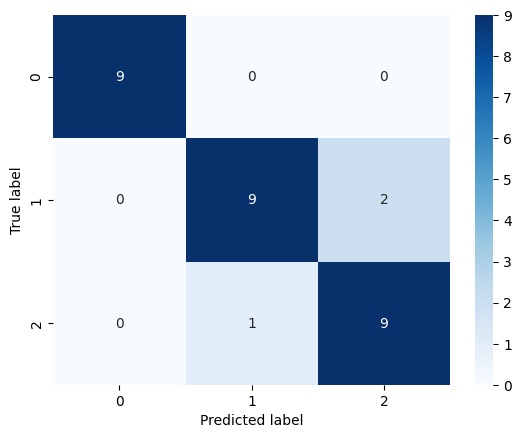

In [16]:
from sklearn.metrics import confusion_matrix

# tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, decisions)
print("Confusion matrix:")
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#dataset2 Blood Transfusion Service Center  Datasets**

This part I will use another two datasets to test my C4.5 decision tree algorithm

**Evaluation dataset 1 - Blood Transfusion Service Center dataset**

This dataset has  5 attributes.

I use this dataset to evaluate whether my algorithm can handle some noise samples in the dataset.

It can be viewed and downloaded from the UCI Machine Learning Repository datasets: http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center

In [ ]:
path="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/KDLVKP/BTL Của Huy"
df2 = pd.read_csv(path+"/2 Code/Hauu/Decision-Tree-C4.5/dataset/transfusion.csv")

# df2 = pd.read_csv("/content/drive/MyDrive/BTL Của Huy/2 Code/Hauu/Decision-Tree-C4.5/dataset/transfusion.csv")
df2.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
attrs2 = df2.keys()[:-1]
print("Số lượng mẫu trong tổng số bộ dữ liệu là {}\n".format(df2.shape[0]))
X_total2 = df2[attrs2]
y_total2 = df2.iloc[:,-1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_total2, y_total2, test_size = 0.2,random_state = 48)

print("Số lượng mẫu trong tập dữ liệu huấn luyện là {}".format(X_train2.shape[0]))
print("Số lượng mẫu trong bộ dữ liệu thử nghiệm là {}".format(X_test2.shape[0]))

Số lượng mẫu trong tổng số bộ dữ liệu là 748

Số lượng mẫu trong tập dữ liệu huấn luyện là 598
Số lượng mẫu trong bộ dữ liệu thử nghiệm là 150


In [ ]:
dt2 = TreeC4_5(X_train2,y_train2)
dt2.fit()

info_gain_ratio , best_split_point 0.06654460422201011 6
info_gain_ratio , best_split_point 0.02522996989982109 4
info_gain_ratio , best_split_point 0.02522996989982109 1000
info_gain_ratio , best_split_point 0.006998968750340705 49
info_gain_ratio , best_split_point 0.009126042444717037 14
info_gain_ratio , best_split_point 0.008830553957426686 1
info_gain_ratio , best_split_point 0.008830553957426686 250
info_gain_ratio , best_split_point 0.026825986753576295 87
info_gain_ratio , best_split_point 0.008937832619047027 14
info_gain_ratio , best_split_point 0.010154159080199865 1
info_gain_ratio , best_split_point 0.010154159080199865 250
info_gain_ratio , best_split_point 0.030991166649550823 86
info_gain_ratio , best_split_point 0.010806847811022233 14
info_gain_ratio , best_split_point 0.009551341561415507 1
info_gain_ratio , best_split_point 0.009551341561415507 250
info_gain_ratio , best_split_point 0.024394990813536143 79
info_gain_ratio , best_split_point 0.010508084720718744 14


In [ ]:
decisions = dt2.predict(X_test2)
results = decisions == y_test2


In [ ]:
# accuracy = sum(results) / len(results)
# print("accuracy ", accuracy)
# precision = precision_score(y_test2, decisions)
# print(f"precision score: {precision}")
# recall=recall_score(y_test2, decisions)
# print(f"recall score: {recall}")
# f1=f1_score(y_test2, decisions)
# print(f"f1 score: {f1}")


accuracy = sum(results) / len(results)
print("accuracy ", accuracy)

precision = precision_score(y_test2, decisions,average="macro")
print(f"precision score: {precision}")

recall=recall_score(y_test2, decisions,average="macro")
print(f"recall score: {recall}")

f1=f1_score(y_test2, decisions,average="macro")
print(f"f1 score: {f1}")

accuracy  0.7333333333333333
precision score: 0.6178977272727273
recall score: 0.5780075187969925
f1 score: 0.5833333333333334


Confusion matrix:
[[100  12]
 [ 28  10]]


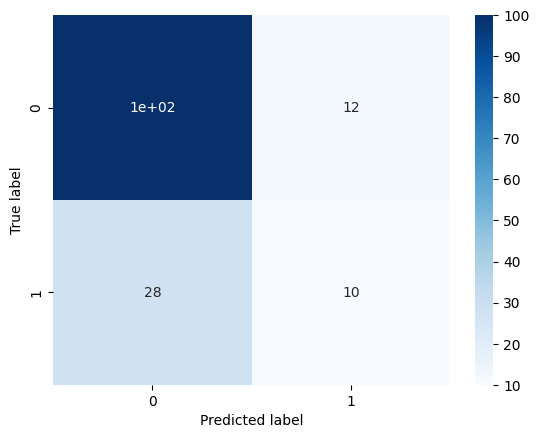

In [ ]:
from sklearn.metrics import confusion_matrix

# tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test2, decisions)
print("Confusion matrix:")
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# dataset 3 - Wine Quality dataset


**dataset 3 - Wine Quality dataset**

---



This dataset has 4898 samples with 12 numerical attributes.

I use this dataset to evaluate whether my algorithm can work well with the dataset with multiple attributes.

It can be viewed and downloaded from the UCI Machine Learning Repository datasets: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [ ]:
path="/content/drive/MyDrive/Tài liệu năm 4/kỳ 2/KDLVKP/BTL Của Huy"
df3 = pd.read_csv(path+"/2 Code/Hauu/Decision-Tree-C4.5/dataset/winequality-red.csv")

# df3 = pd.read_csv("/content/drive/MyDrive/BTL Của Huy/2 Code/Hauu/Decision-Tree-C4.5/dataset/winequality-red.csv")

# Here I randomly select 750 samples of the total
# df3 = df3.sample(n random_state=50, axis=0)

def change_target_type(x):
  if x > 6.5:
    return 1
  else:
    return 0

df3.loc[:,"quality"] = df3["quality"].apply(change_target_type)
df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
attrs3 = df3.keys()[:-1]
print("Số lượng mẫu trong tổng số bộ dữ liệu là {}\n".format(df3.shape[0]))
X_total3 = df3[attrs3]
y_total3 = df3.iloc[:,-1]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_total3, y_total3, test_size = 0.2,random_state = 42)


print("Số lượng mẫu trong tập dữ liệu huấn luyện là {}".format(X_train3.shape[0]))
print("Số lượng mẫu trong bộ dữ liệu thử nghiệm là {}".format(X_test3.shape[0]))

Số lượng mẫu trong tổng số bộ dữ liệu là 1599

Số lượng mẫu trong tập dữ liệu huấn luyện là 1279
Số lượng mẫu trong bộ dữ liệu thử nghiệm là 320


In [ ]:
# print(y_test3)
y_test3_np=y_test3.to_list()
y_test3_np
count=0
for i in y_test3_np :
   if i==0 : count+=1
print(count)

273


In [ ]:
dt3 = TreeC4_5(X_train3,y_train3)
dt3.fit()

info_gain_ratio , best_split_point 0.014217874676613899 8.4
info_gain_ratio , best_split_point 0.06592102390519275 0.42
info_gain_ratio , best_split_point 0.047392173728573 0.31
info_gain_ratio , best_split_point 0.010930233390934564 3.45
info_gain_ratio , best_split_point 0.030611581488799767 0.067
info_gain_ratio , best_split_point 0.010293376202063184 13.0
info_gain_ratio , best_split_point 0.025245600368552844 49.0
info_gain_ratio , best_split_point 0.04192734355820593 0.99536
info_gain_ratio , best_split_point 0.005021709006435126 3.38
info_gain_ratio , best_split_point 0.06513426254372896 0.67
info_gain_ratio , best_split_point 0.14145476427498407 11.5
info_gain_ratio , best_split_point 0.052131924665446853 7.8
info_gain_ratio , best_split_point 0.06350743469237152 0.42
info_gain_ratio , best_split_point 0.06837030279990443 0.31
info_gain_ratio , best_split_point 0.12587251209072278 1.3
info_gain_ratio , best_split_point 0.14306384837512526 0.012
info_gain_ratio , best_split_poin

In [ ]:
decisions = dt3.predict(X_test3)
results = decisions == y_test3


In [ ]:
accuracy = sum(results) / len(results)
print("accuracy ", accuracy)

precision = precision_score(y_test3, decisions,average="macro")
print(f"precision score: {precision}")

recall=recall_score(y_test3, decisions,average="macro")
print(f"recall score: {recall}")

f1=f1_score(y_test3, decisions,average="macro")
print(f"f1 score: {f1}")

accuracy  0.859375
precision score: 0.7235449735449735
recall score: 0.7502532928064842
f1 score: 0.7354837524568782


In [ ]:
accuracy = sum(results) / len(results)
print("accuracy ", accuracy)

precision = precision_score(y_test3, decisions)
print(f"precision score: {precision}")

recall=recall_score(y_test3, decisions)
print(f"recall score: {recall}")

f1=f1_score(y_test3, decisions)
print(f"f1 score: {f1}")

accuracy  0.859375
precision score: 0.5185185185185185
recall score: 0.5957446808510638
f1 score: 0.5544554455445543


Confusion matrix:
[[247  26]
 [ 19  28]]


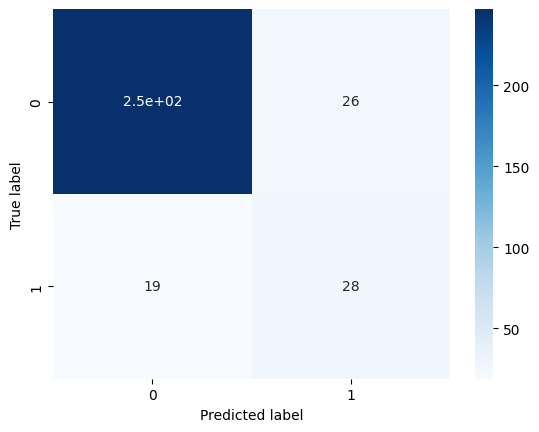

In [ ]:
from sklearn.metrics import confusion_matrix

# tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test3, decisions)
print("Confusion matrix:")
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()